In [1]:
# Importing required package 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from hurst import compute_Hc


In [2]:
!pip install hurst

In [3]:
# Reading the data

data = pd.read_csv('intern_dataset.csv')

In [4]:
# This will show the top 5 data in our dataset

data.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


# Exploratory data analysis

In [5]:
# To Check the total number of rows and columns are present in our dataset 

print("This dataset contain {} rows and {} columns.". format(len(data), len(data.columns)))

This dataset contain 912000 rows and 4 columns.


We can get a clear idea that we have 4 Columns and 912000 rows in the given data set 

In [6]:
# TO see the type of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
Time       912000 non-null object
Signal1    912000 non-null float64
Signal2    912000 non-null float64
Label      912000 non-null object
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


In [7]:
# To better understand the numeric data, we want to use the .describe() method. 
# This gives us an understanding of the central tendencies of the data. 

data.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


In [8]:
# To check our data contain any null values 

data.isnull().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

This dataset does not contain any null values 

Text(0.5, 1.0, 'Number for lable present')

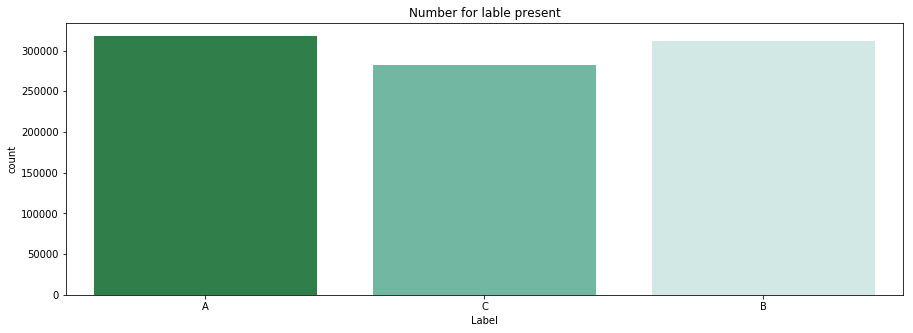

In [9]:
# Analysing the categorical value in the dataset 

fig = plt.subplots(figsize=(15, 5))
sns.countplot(data['Label'],palette=("BuGn_r"))
plt.title("Number for lable present")

We can see that there are 3 categories in our dataset and we can obtain that A and B are so close to each other. so that we can calculate the count. 

In [10]:
# To calculate the count of the categories in the dataset

data['Label'].value_counts()

A    318000
B    312000
C    282000
Name: Label, dtype: int64

Therefore A has higher count second B and last is C

Text(0.5, 0.98, 'Checking the Normal Distribution or Gaussian Distribution for signals')

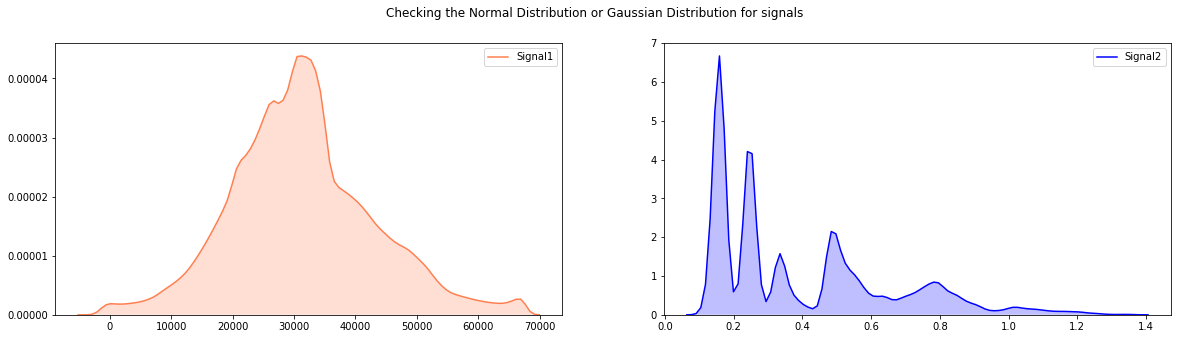

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.kdeplot(data['Signal1'], shade = True, color = 'coral', ax=ax[0])
sns.kdeplot(data['Signal2'], shade = True, color = 'blue', ax=ax[1])
fig.suptitle("Checking the Normal Distribution or Gaussian Distribution for signals")

We can see that 
* Signal 1 is nearly to Normal Distribution but not.
* Signal 2 is Right Skewed and with improper Distribuction.  

In [12]:
# Converting object to dataframe 

data['Time'] = pd.to_datetime(data['Time'])
data['New_Date'], data['New_Time'] = data['Time'].dt.normalize(), data['Time'].dt.time

In [13]:
data.head()

,Time,Signal1,Signal2,Label,New_Date,New_Time
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A,2017-08-14,11:37:49.791000
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A,2017-08-14,11:37:49.801000
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A,2017-08-14,11:37:49.811000
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A,2017-08-14,11:37:49.821000
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A,2017-08-14,11:37:49.831000


In [14]:
# Counting the dates 

data['New_Date'].value_counts()

2017-09-19    312000
2017-08-12    192000
2017-09-26    186000
2017-08-14    132000
2020-01-04     90000
Name: New_Date, dtype: int64

We can see that we have two years 2017 and 2020, and in 2017 we have 2 months and that also we have 4 days particular 

Text(0.5, 1.0, 'Signal structure')

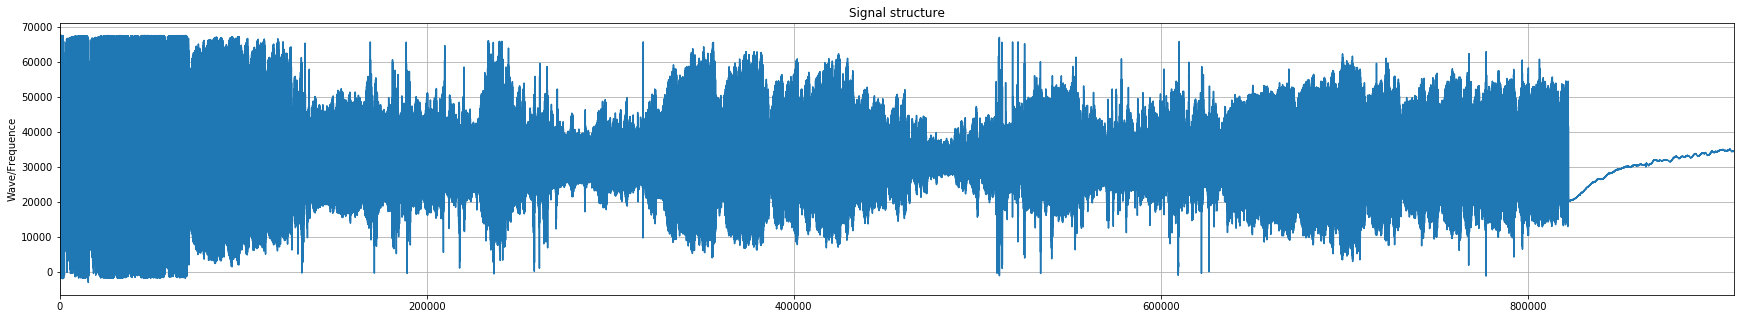

In [15]:
# The total wave structure in signal 1

plt.figure(figsize=(30,5))
data['Signal1'].plot(grid=True)
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')

Text(0.5, 1.0, 'Signal structure')

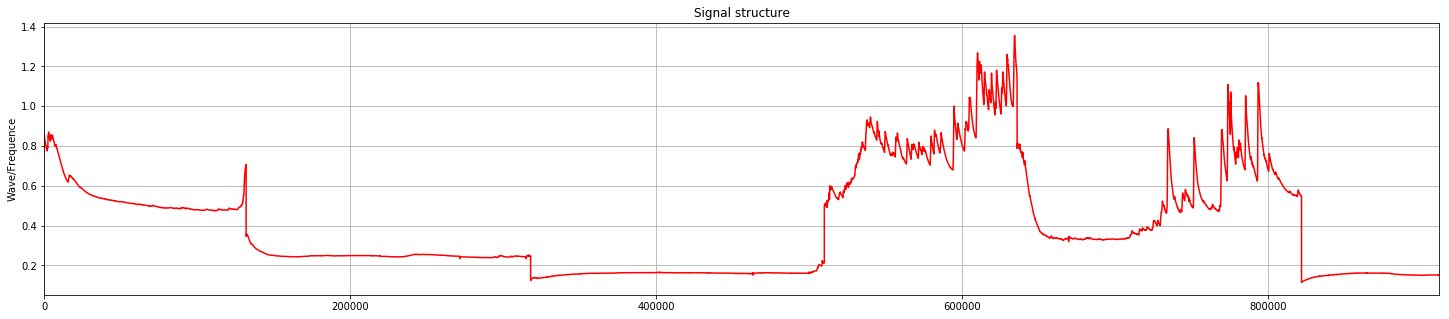

In [16]:
# The total wave structure in the signal 2 

plt.figure(figsize=(25,5))
data['Signal2'].plot(grid=True, color='red')
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')

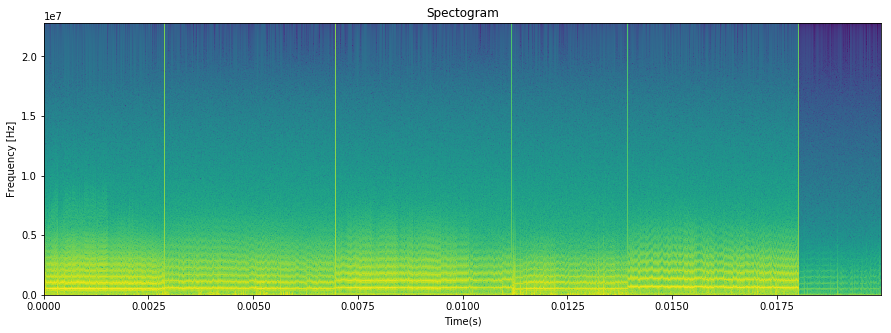

In [17]:
from scipy import signal as sgn
M = 1024
rate = 1/(2e-2/data['Signal1'].size)

freqs, times, Sx = sgn.spectrogram(data['Signal1'].values, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend='constant', scaling='spectrum')

f, ax = plt.subplots(figsize=(15, 5))
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time(s)')
ax.set_title('Spectogram')
ax.pcolormesh(times, freqs, np.log10(Sx), cmap='viridis')

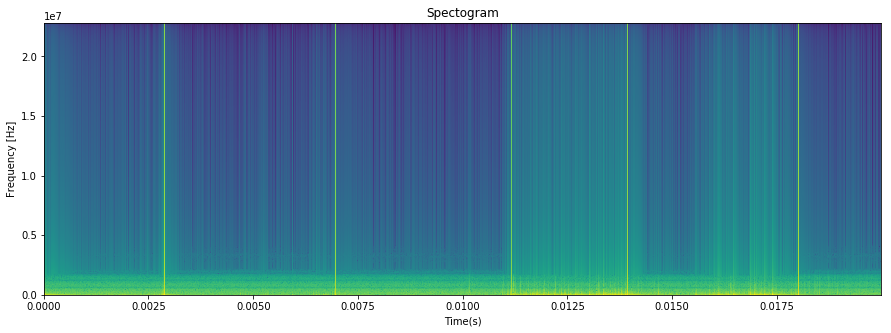

In [18]:
from scipy import signal as sgn
M = 1024
rate = 1/(2e-2/data['Signal2'].size)

freqs, times, Sx = sgn.spectrogram(data['Signal2'].values, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend='constant', scaling='spectrum')

f, ax = plt.subplots(figsize=(15, 5))
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time(s)')
ax.set_title('Spectogram')
ax.pcolormesh(times, freqs, np.log10(Sx), cmap='viridis')


Now we have the temporal behavior of frequencies that compose our signal in terms of their magnitudes. Aggregations can be made on both time and frequency axes by selecting appropriate window sizes

### Analysing each Label in the data set with respective to there signal pattern 

In [19]:
# Analysing every catagorical data

A_label = data.loc[data['Label'] == 'A']
B_label = data.loc[data['Label'] == 'B']
C_label = data.loc[data['Label'] == 'C']

### Label A

In [20]:
# This is for label A

A_label.head()

,Time,Signal1,Signal2,Label,New_Date,New_Time
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A,2017-08-14,11:37:49.791000
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A,2017-08-14,11:37:49.801000
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A,2017-08-14,11:37:49.811000
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A,2017-08-14,11:37:49.821000
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A,2017-08-14,11:37:49.831000


In [21]:
print("The Min time is label A is:", A_label['Time'].min())
print("The Max time is label A is:", A_label['Time'].min())

The Min time is label A is: 2017-08-14 11:37:49.791000
The Max time is label A is: 2017-08-14 11:37:49.791000


In [22]:
A_label['New_Date'].value_counts()

2017-09-19    186000
2017-08-14    132000
Name: New_Date, dtype: int64

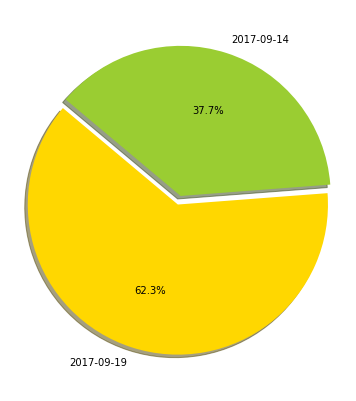

In [23]:
plt.figure(figsize=(6, 7))
labels = '2017-09-19', '2017-09-14'
sizes = [215, 130]
colors = ['gold', 'yellowgreen']
explode = (0.06, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

We can see that 2017-09-19 more number of recorde in it 

# Hurst Exponent for Label A

Text(0.5, 1.0, 'Signal structure')

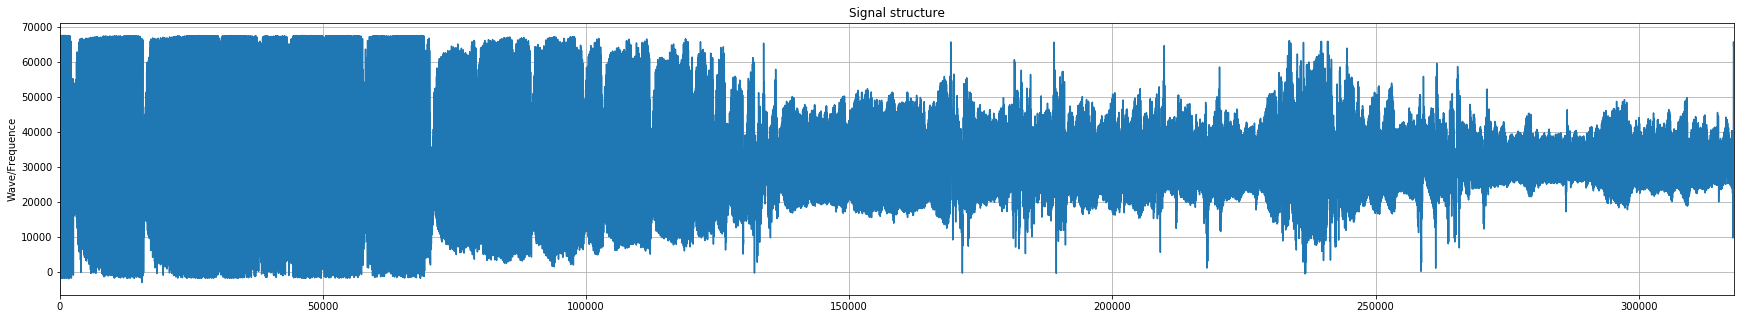

In [24]:
plt.figure(figsize=(30,5))
A_label['Signal1'].plot(grid=True)
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')

In [25]:
df = pd.DataFrame(A_label['Signal1'])
H, c, val = compute_Hc(df)
print('Hurst Exponent = {:.4f}'.format(H))

Hurst Exponent = 0.0072


H < 0.5, the series is exhibiting a tendency to reverse.

Text(0.5, 1.0, 'Signal structure')

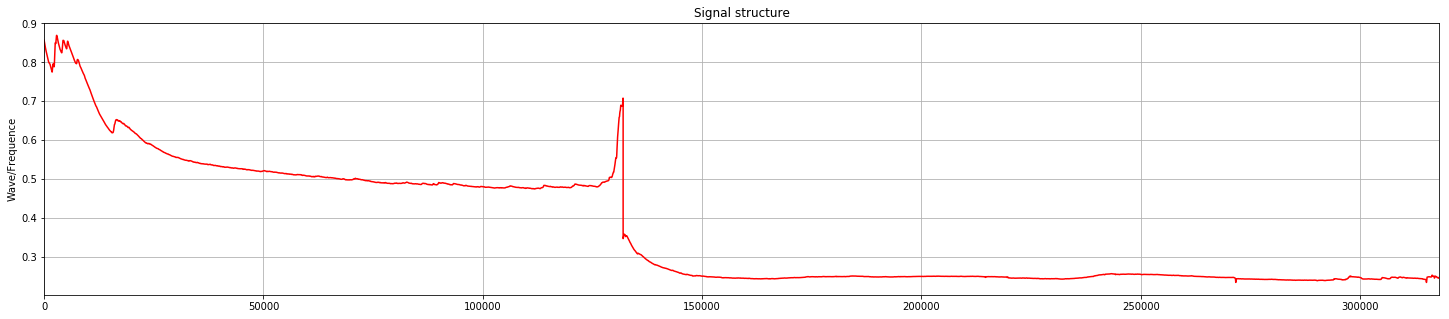

In [26]:
plt.figure(figsize=(25,5))
A_label['Signal2'].plot(grid=True, color = 'red')
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')

### Label B

In [27]:
# This is for label B

B_label.head()

,Time,Signal1,Signal2,Label,New_Date,New_Time
510000,2017-09-19 12:18:25.698,47842.554832,0.499167,B,2017-09-19,12:18:25.698000
510001,2017-09-19 12:18:25.708,48258.447534,0.499155,B,2017-09-19,12:18:25.708000
510002,2017-09-19 12:18:25.718,48654.923757,0.499143,B,2017-09-19,12:18:25.718000
510003,2017-09-19 12:18:25.728,49015.036918,0.499130,B,2017-09-19,12:18:25.728000
510004,2017-09-19 12:18:25.738,49323.169365,0.499117,B,2017-09-19,12:18:25.738000


In [28]:
B_label['New_Date'].value_counts()

2017-09-26    186000
2017-09-19    126000
Name: New_Date, dtype: int64

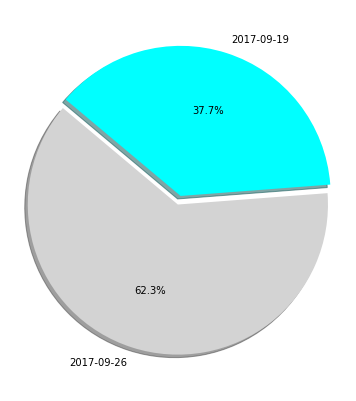

In [29]:
plt.figure(figsize=(6, 7))
labels = '2017-09-26', '2017-09-19'
sizes = [215, 130]
colors = ['lightgray', 'cyan']
explode = (0.06, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

We can see that 2017-09-26 more number of recorde in it

Text(0.5, 1.0, 'Signal structure')

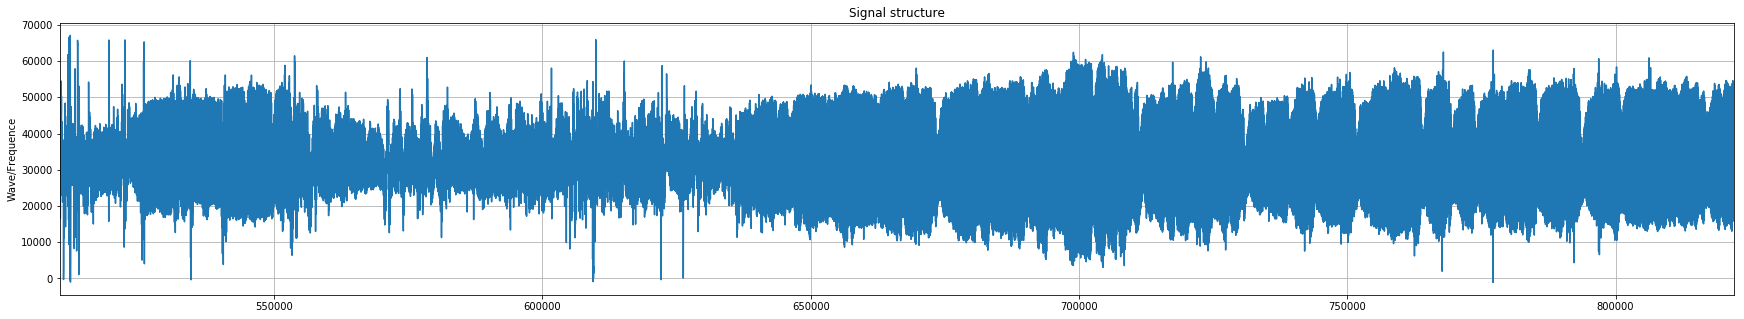

In [30]:
plt.figure(figsize=(30,5))
B_label['Signal1'].plot(grid=True)
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')

In [31]:
df = pd.DataFrame(B_label['Signal1'])
H, c, val = compute_Hc(df)
print('Hurst Exponent = {:.4f}'.format(H))

Hurst Exponent = 0.0296


Text(0.5, 1.0, 'Signal structure')

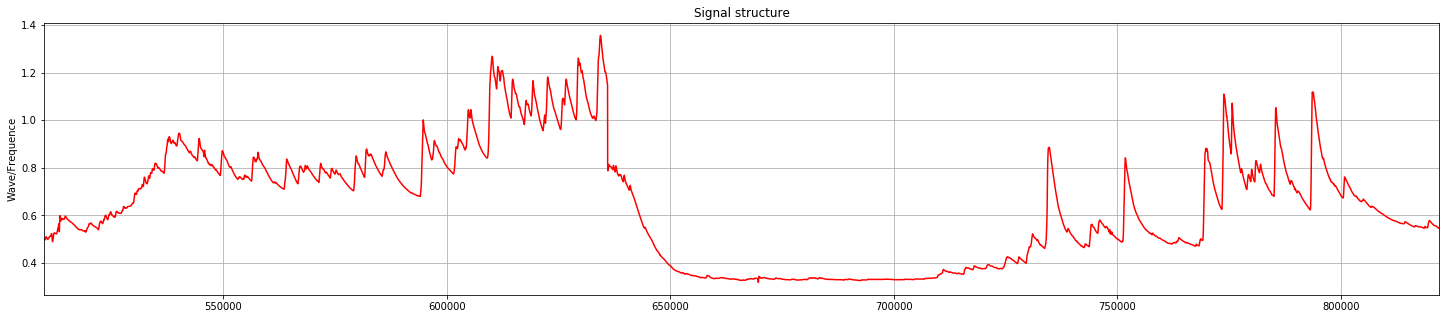

In [32]:
plt.figure(figsize=(25,5))
B_label['Signal2'].plot(grid=True, color = 'red')
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')

### Label C

In [33]:
# This is for label c

C_label.head()

,Time,Signal1,Signal2,Label,New_Date,New_Time
318000,2017-08-12 11:08:25.785,22719.403196,0.123263,C,2017-08-12,11:08:25.785000
318001,2017-08-12 11:08:25.795,23608.265317,0.123268,C,2017-08-12,11:08:25.795000
318002,2017-08-12 11:08:25.805,24524.544926,0.123273,C,2017-08-12,11:08:25.805000
318003,2017-08-12 11:08:25.815,25479.836092,0.123279,C,2017-08-12,11:08:25.815000
318004,2017-08-12 11:08:25.825,26475.848059,0.123285,C,2017-08-12,11:08:25.825000


In [34]:
C_label['New_Date'].value_counts()

2017-08-12    192000
2020-01-04     90000
Name: New_Date, dtype: int64

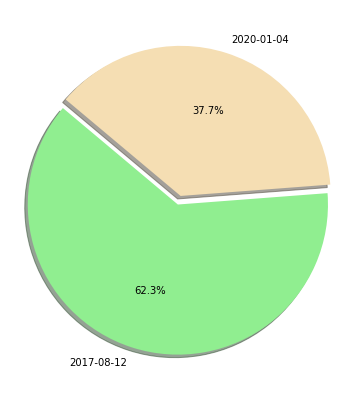

In [35]:
plt.figure(figsize=(6, 7))
labels = '2017-08-12', '2020-01-04'
sizes = [215, 130]
colors = ['lightgreen', 'wheat']
explode = (0.06, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

We can see that 2017-08-12 more number of recorde in it

Text(0.5, 1.0, 'Signal structure')

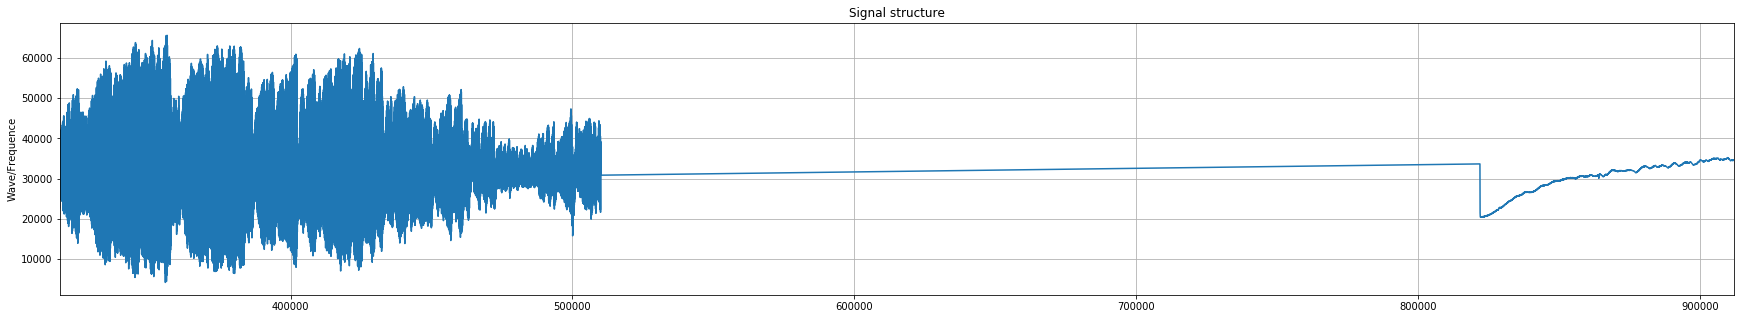

In [36]:
plt.figure(figsize=(30,5))
C_label['Signal1'].plot(grid=True)
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')

In [37]:
df = pd.DataFrame(C_label['Signal1'])
H, c, val = compute_Hc(df)
print('Hurst Exponent = {:.4f}'.format(H))

Hurst Exponent = 0.1315


Text(0.5, 1.0, 'Signal structure')

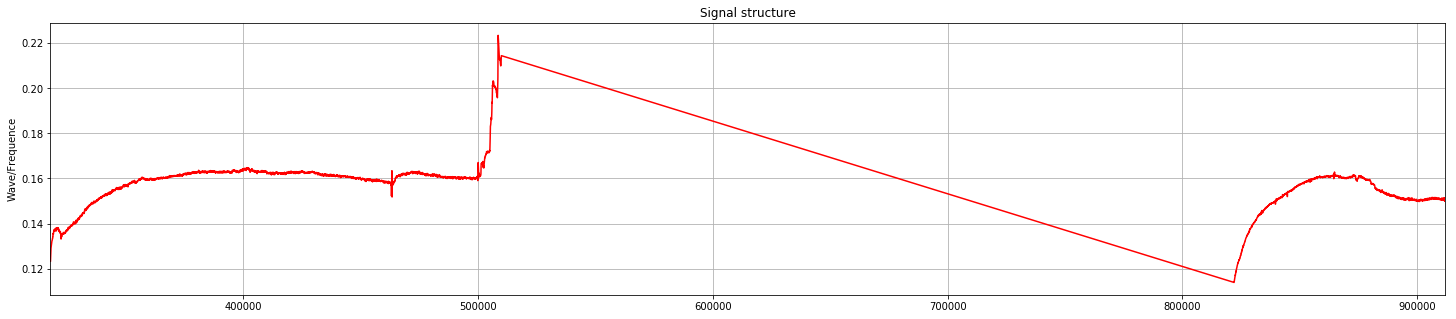

In [38]:
plt.figure(figsize=(25,5))
C_label['Signal2'].plot(grid=True, color = 'red')
plt.ylabel('Wave/Frequence')
plt.title('Signal structure')